In [1]:
import re

import pandas as pd
from pathlib import Path
from ploting import *

In [2]:
root_path = "crusher"

In [16]:
name_re = re.compile("(weak|strong)_scaling-(\w+)-(\d+pt)-n_(\d+)-([\w_]+)_comm-(gpu|cpu)-nodes_(\d+)-ppn_(\d+)")

In [17]:
time_re = re.compile("DURATION:\s*(\d+(\.\d+)?(e[+-]\d+)?)")

In [18]:
size_re = re.compile("SIZE:\s*(\d+)")

In [19]:
stencil_type = dict([((True, 2), "5pt"), ((True, 3), "7pt"), ((False, 2), "9pt"), ((False, 3), "27pt")])

In [20]:
num_gpus = 8

In [42]:
data = []
for file in Path(f"{root_path}/data_solvers").iterdir():
    if m := name_re.search(file.name):
        with open(file, "r") as input:
            input_str = input.read()
            duration = 0
            size = 0
            if t_m := time_re.search(input_str):
                duration = t_m.group(1)
            if s_m := size_re.search(input_str):
                size = s_m.group(1)
            data.append({"scaling": m.group(1), "solver": m.group(2), "stencil": m.group(3), "n": m.group(4),
                         "comm_pattern": m.group(5),
                         "type": m.group(6), "nodes": m.group(7), "ppn": m.group(8), "time": duration, "size": size})
df = pd.DataFrame(data).drop(columns=["scaling", "type"]).astype({"n": int, "nodes": int, "ppn": int, "time": float, "size": int})
df

,solver,stencil,n,comm_pattern,nodes,ppn,time,size
0,cgs,27pt,1000000,optimal,16,8,0.001489,128000000
1,bicgstab,27pt,1000000,optimal,1,1,0.001250,1000000
2,cgs,27pt,1000000,optimal,2,8,0.001436,16000000
3,bicgstab,27pt,1000000,optimal,1,8,0.001480,8000000
4,cgs,27pt,1000000,optimal,32,8,0.001509,256000000
5,bicgstab,27pt,1000000,optimal,128,8,0.001701,1024000000
6,cgs,27pt,1000000,optimal,4,8,0.001451,32000000
7,bicgstab,27pt,1000000,optimal,16,8,0.001575,128000000
8,cgs,27pt,1000000,optimal,8,8,0.001469,64000000
9,bicgstab,27pt,1000000,optimal,2,8,0.001516,16000000


In [43]:
df["gpus"] = df["nodes"] * df["ppn"]

In [44]:
piv = df.drop(columns=["n", "size", "nodes", "stencil", "comm_pattern"]).pivot(index="gpus", columns=["solver"], values="time")
piv = piv[piv.columns.sort_values()]
piv

solver,bicgstab,cg,cgs,fcg
gpus,,,,
1,0.001250,0.000656,0.001242,0.000677
8,0.001480,0.000752,0.001416,0.000793
16,0.001516,0.000766,0.001436,0.000816
32,0.001536,0.000777,0.001451,0.000833
64,0.001554,0.000787,0.001469,0.000848
128,0.001575,0.000802,0.001489,0.000868
256,0.001603,0.000820,0.001509,0.000889
512,0.001629,0.000834,0.001530,0.000914
1024,0.001701,0.000890,0.001569,0.000979


In [85]:
df[["n", "stencil", "solver"]].agg(lambda x: x[2], axis=1)

0          cgs
1     bicgstab
2          cgs
3     bicgstab
4          cgs
5     bicgstab
6          cgs
7     bicgstab
8          cgs
9     bicgstab
10         cgs
11    bicgstab
12    bicgstab
13         fcg
14    bicgstab
15         fcg
16    bicgstab
17         fcg
18          cg
19         fcg
20          cg
21         fcg
22          cg
23         fcg
24          cg
25         fcg
26          cg
27         fcg
28          cg
29         fcg
30          cg
31          cg
32          cg
33         cgs
34         cgs
35         cgs
dtype: object

In [113]:
df["flop"] = df[["size", "stencil", "solver"]].agg(lambda x: flops[x[2]](x[0], x[0] * int(x[1][:-2])), axis=1)
df["flop/s"] = df.flop / df.time
df

,solver,stencil,n,comm_pattern,nodes,ppn,time,size,gpus,flop,flop/s
0,cgs,27pt,1000000,optimal,16,8,0.001489,128000000,128,16000000000,1.074561e+13
1,bicgstab,27pt,1000000,optimal,1,1,0.001250,1000000,1,134000000,1.072120e+11
2,cgs,27pt,1000000,optimal,2,8,0.001436,16000000,16,2000000000,1.392312e+12
3,bicgstab,27pt,1000000,optimal,1,8,0.001480,8000000,8,1072000000,7.242313e+11
4,cgs,27pt,1000000,optimal,32,8,0.001509,256000000,256,32000000000,2.121228e+13
5,bicgstab,27pt,1000000,optimal,128,8,0.001701,1024000000,1024,137216000000,8.068729e+13
6,cgs,27pt,1000000,optimal,4,8,0.001451,32000000,32,4000000000,2.756625e+12
7,bicgstab,27pt,1000000,optimal,16,8,0.001575,128000000,128,17152000000,1.088974e+13
8,cgs,27pt,1000000,optimal,8,8,0.001469,64000000,64,8000000000,5.444992e+12
9,bicgstab,27pt,1000000,optimal,2,8,0.001516,16000000,16,2144000000,1.414369e+12


In [114]:
def bicgstab(n, nnz):
    return 2 * n + 8 * n + 2 * nnz + 2 * n + 3 * n + 2 * nnz + 2 * n + 2 * n + 7 * n
def cgs(n, nnz):
    return 2 * n + 7 * n + 2 * nnz + 4 * n + 2 * nnz + 4 * n
def fcg(n, nnz):
    return 2 * n + 2 * n + 3 * n + 2 * nnz + 2 * n + 6 * n
def cg(n, nnz):
    return 12 * n + 2 * nnz

flops = {"bicgstab": bicgstab,
         "cgs": cgs,
         "fcg": fcg,
         "cg": cg}

In [115]:
piv_flops = df[df.n >= 100000].drop(columns=["size", "nodes", "flop", "time", "comm_pattern", "stencil"]).pivot(index="gpus", columns=["solver"], values="flop/s")
piv_flops = piv_flops[piv_flops.columns.sort_values()]
piv_flops

solver,bicgstab,cg,cgs,fcg
gpus,,,,
1,1.072120e+11,1.006621e+11,1.006490e+11,1.019761e+11
8,7.242313e+11,7.018654e+11,7.062047e+11,6.959398e+11
16,1.414369e+12,1.378115e+12,1.392312e+12,1.353291e+12
32,2.791031e+12,2.718070e+12,2.756625e+12,2.652185e+12
64,5.517774e+12,5.365220e+12,5.444992e+12,5.204816e+12
128,1.088974e+13,1.053993e+13,1.074561e+13,1.017004e+13
256,2.139480e+13,2.061277e+13,2.121228e+13,1.986116e+13
512,4.211534e+13,4.050138e+13,4.181640e+13,3.865098e+13
1024,8.068729e+13,7.595167e+13,8.157231e+13,7.219255e+13


In [128]:
_df = piv_flops
linear_scaling_x = [0] + list(_df.index) + [2000]
linear_scaling = [_df["bicgstab"][1] * 1 / 1e12 * i / _df.index[0] for i in linear_scaling_x]
linear_scaling

[0.0,
 0.10721200774486743,
 0.8576960619589394,
 1.7153921239178789,
 3.4307842478357577,
 6.8615684956715155,
 13.723136991343031,
 27.446273982686062,
 54.892547965372124,
 109.78509593074425,
 214.42401548973487]

In [129]:
linear_scaling_x

[0, 1, 8, 16, 32, 64, 128, 256, 512, 1024, 2000]

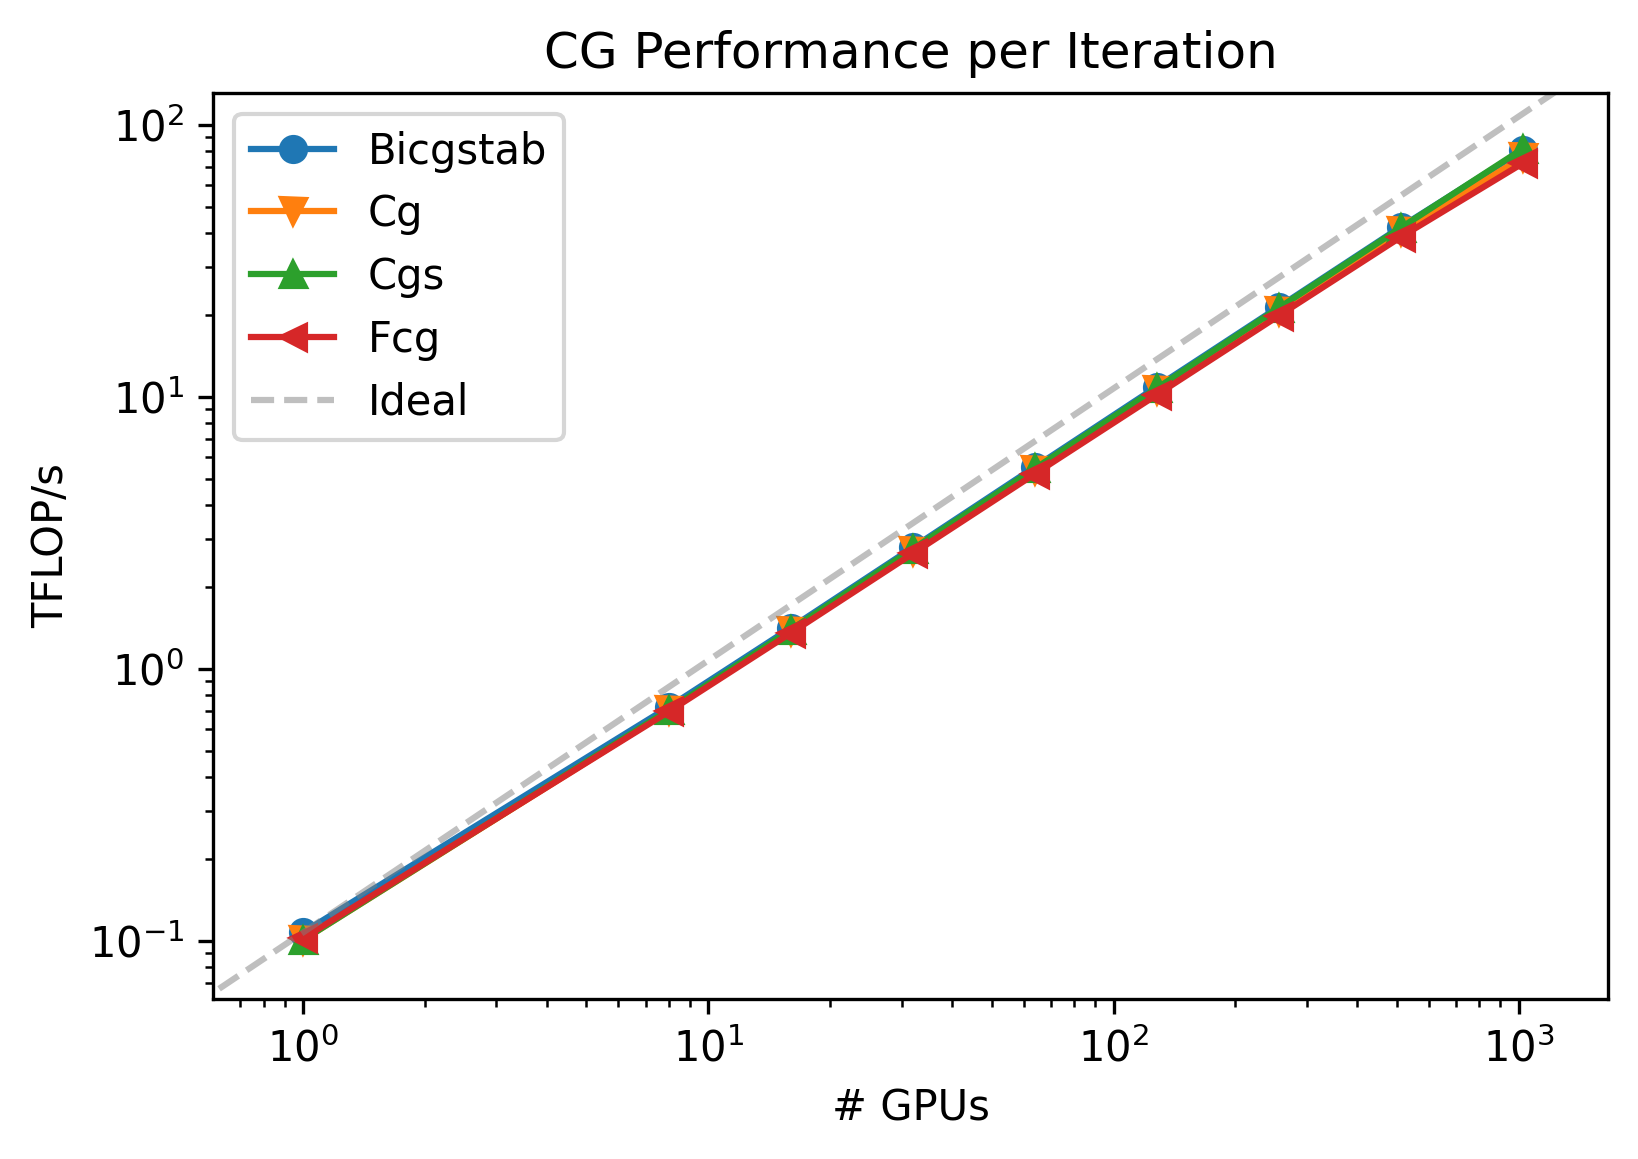

In [130]:
_df = piv_flops
fig, ax = plt.subplots(dpi=300)
ax.set_prop_cycle(default_cycler)
ax.set_title(f"CG Performance per Iteration")
(_df / 1e12).plot(ax=ax, legend=True, logx=True, logy=True)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.plot(linear_scaling_x, linear_scaling, '--', color="grey", alpha=0.5)
ax.legend([n.capitalize() for n in piv_flops.columns] + ["Ideal"])
ax.set_xlim([xlim[0] * 0.85, xlim[1] * 1.15])
ax.set_ylim([ylim[0] * 0.85, ylim[1] * 1.15])
ax.set_xlabel("# GPUs")
ax.set_ylabel("TFLOP/s")
fig.savefig(f"{root_path}/img/optimal-flops.png")

In [27]:
"3pt"[:-2]

'3'